# Импорт библиотек

In [47]:
import pandas as pd 
import seaborn as sns
from matplotlib import pyplot as plt

# Настройка CometML
<img src='https://camo.githubusercontent.com/b35adf34bc440ea2ac19bb0d3432f48e26d71ab8e4c256e936b709eec44f5b19/68747470733a2f2f7777772e636f6d65742e6d6c2f696d616765732f6c6f676f5f636f6d65745f6c696768742e706e67' width=500px>

In [48]:
# !pip install comet_ml

In [49]:
from comet_ml import Experiment

In [50]:
# Создайте эксперимент с помощью вашего API ключа
experiment = Experiment(
    api_key="I1vM5jywyHjyrHOHaffYqCv6z",
    project_name="med-appointment",
    workspace="chepell",
)

COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET INFO: Experiment is live on comet.ml https://www.comet.ml/chepell/med-appointment/824fed22e6e54dd5bfcf0e193b17bb26



# Загрузка данных

In [93]:
df = pd.read_csv('data/KaggleV2-May-2016.csv.zip')

In [94]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


# Визуализация

### Распределение числовых признаков

{'web': 'https://www.comet.ml/api/image/download?imageId=fb38d77e9819436c8bfccbfaa52c9783&experimentKey=824fed22e6e54dd5bfcf0e193b17bb26',
 'api': 'https://www.comet.ml/api/rest/v1/image/get-image?imageId=fb38d77e9819436c8bfccbfaa52c9783&experimentKey=824fed22e6e54dd5bfcf0e193b17bb26',
 'imageId': 'fb38d77e9819436c8bfccbfaa52c9783'}

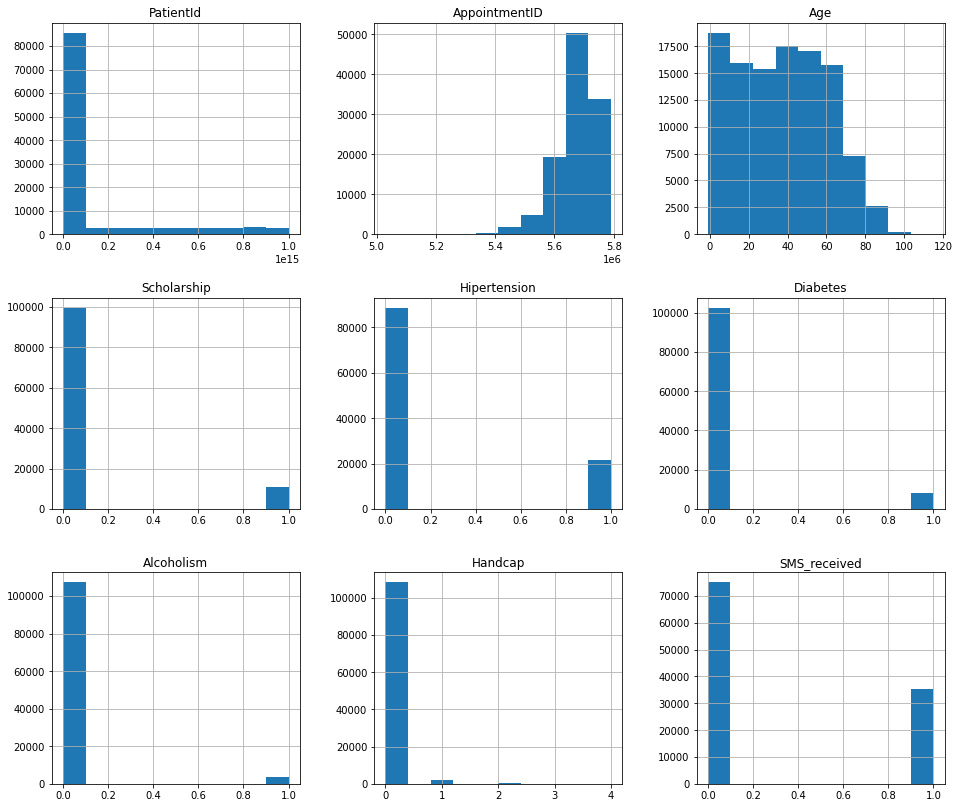

In [53]:
df.hist(figsize=(16,14));
# логируем гистограмму
experiment.log_figure(figure=plt)

*Проанализируем число людей каждого возраста*

In [54]:
ages = df['Age'].unique()
ages.sort()

In [55]:
print(f"Уникальные значения в `Age` => {ages}")

Уникальные значения в `Age` => [ -1   0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16
  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34
  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52
  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70
  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88
  89  90  91  92  93  94  95  96  97  98  99 100 102 115]


In [56]:
# Удалим аномальные значения
df = df[(df['Age'] >= 0) & (df['Age'] <= 110)]
df['Age'].value_counts()

0      3539
1      2273
52     1746
49     1652
53     1651
       ... 
97       11
98        6
100       4
102       2
99        1
Name: Age, Length: 102, dtype: int64

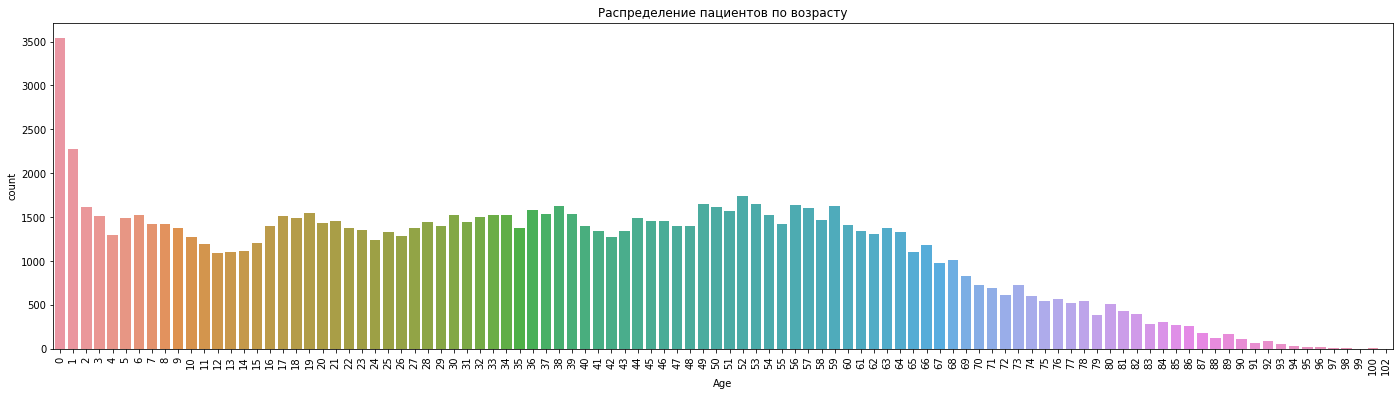

In [57]:
plt.figure(figsize=(24,6))
plt.xticks(rotation=90)
ax = sns.countplot(x=df['Age'])
ax.set_title("Распределение пациентов по возрасту")
experiment.log_figure(figure=plt)
plt.show()

# Прийдет ли пациент на назначенный прием?

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110521 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110521 non-null  float64
 1   AppointmentID   110521 non-null  int64  
 2   Gender          110521 non-null  object 
 3   ScheduledDay    110521 non-null  object 
 4   AppointmentDay  110521 non-null  object 
 5   Age             110521 non-null  int64  
 6   Neighbourhood   110521 non-null  object 
 7   Scholarship     110521 non-null  int64  
 8   Hipertension    110521 non-null  int64  
 9   Diabetes        110521 non-null  int64  
 10  Alcoholism      110521 non-null  int64  
 11  Handcap         110521 non-null  int64  
 12  SMS_received    110521 non-null  int64  
 13  No-show         110521 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 12.6+ MB


In [59]:
# Сколько пропусков в столбцах
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

## Кодировка категориальных признаков

In [60]:
df['Neighbourhood'].value_counts()

JARDIM CAMBURI                 7717
MARIA ORTIZ                    5805
RESISTÊNCIA                    4431
JARDIM DA PENHA                3877
ITARARÉ                        3514
                               ... 
ILHA DO BOI                      35
ILHA DO FRADE                    10
AEROPORTO                         8
ILHAS OCEÂNICAS DE TRINDADE       2
PARQUE INDUSTRIAL                 1
Name: Neighbourhood, Length: 81, dtype: int64

In [61]:
# Смотрим наколичество уникальных значений
num_unique = df['Neighbourhood'].nunique()
num_unique


81

In [62]:
# Количество повторений значений в % от всей выборки
Neighbourhood_counts = df['Neighbourhood'].value_counts(normalize=True)
Neighbourhood_counts

JARDIM CAMBURI                 0.069824
MARIA ORTIZ                    0.052524
RESISTÊNCIA                    0.040092
JARDIM DA PENHA                0.035079
ITARARÉ                        0.031795
                                 ...   
ILHA DO BOI                    0.000317
ILHA DO FRADE                  0.000090
AEROPORTO                      0.000072
ILHAS OCEÂNICAS DE TRINDADE    0.000018
PARQUE INDUSTRIAL              0.000009
Name: Neighbourhood, Length: 81, dtype: float64

In [63]:
# Оставляю варианты которые составляют не менее 2% от всей выборки
Neighbourhood_counts_filter = Neighbourhood_counts[Neighbourhood_counts > 0.02]
Neighbourhood_counts_filter

JARDIM CAMBURI       0.069824
MARIA ORTIZ          0.052524
RESISTÊNCIA          0.040092
JARDIM DA PENHA      0.035079
ITARARÉ              0.031795
CENTRO               0.030166
TABUAZEIRO           0.028339
SANTA MARTHA         0.028329
JESUS DE NAZARETH    0.025814
BONFIM               0.025090
SANTO ANTÔNIO        0.024846
SANTO ANDRÉ          0.023263
CARATOÍRA            0.023208
JABOUR               0.022702
SÃO PEDRO            0.022150
ILHA DO PRÍNCIPE     0.020503
NOVA PALESTINA       0.020485
ANDORINHAS           0.020431
DA PENHA             0.020060
ROMÃO                0.020032
Name: Neighbourhood, dtype: float64

In [64]:
# Оставляю только те районы который повторяются в выборке более 2% раз, все что ниже кодирую как OTHER
neighbourhood_list = Neighbourhood_counts_filter.index.to_list()
df['Neighbourhood'] = df['Neighbourhood'].apply(lambda x: x if x in neighbourhood_list else 'OTHER')

In [65]:
num_unique = df['Neighbourhood'].nunique()
num_unique

21

In [66]:
experiment.log_parameter('$_Unique Neighbourhood', num_unique)

In [67]:
categorical_columns_names = ['Gender', 'Neighbourhood']

In [68]:
encoded_columns = pd.get_dummies(df, columns = categorical_columns_names)

In [69]:
encoded_columns.drop(['AppointmentID', 'PatientId', 'ScheduledDay', 'AppointmentDay', 'No-show'], axis=1, inplace = True)

In [70]:
encoded_columns.head()

,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Gender_F,Gender_M,Neighbourhood_ANDORINHAS,...,Neighbourhood_MARIA ORTIZ,Neighbourhood_NOVA PALESTINA,Neighbourhood_OTHER,Neighbourhood_RESISTÊNCIA,Neighbourhood_ROMÃO,Neighbourhood_SANTA MARTHA,Neighbourhood_SANTO ANDRÉ,Neighbourhood_SANTO ANTÔNIO,Neighbourhood_SÃO PEDRO,Neighbourhood_TABUAZEIRO
0,62,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,56,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,62,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
3,8,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
4,56,0,1,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [71]:
y = df['No-show']

In [72]:
y

0         No
1         No
2         No
3         No
4         No
          ..
110522    No
110523    No
110524    No
110525    No
110526    No
Name: No-show, Length: 110521, dtype: object

In [73]:
y = y.replace({'No': 0, 'Yes': 1})

In [74]:
y.value_counts(True)

0    0.798084
1    0.201916
Name: No-show, dtype: float64

## Шкалирование данных

In [75]:
from sklearn.preprocessing import MinMaxScaler, RobustScaler

In [76]:
# scaler = MinMaxScaler()
scaler = RobustScaler()
X = scaler.fit_transform(encoded_columns)

In [77]:
print(X.shape)

(110521, 30)


# Модель (этот раздел будет подробно изучен далее в курсе)

In [78]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

### Инициализация модели

In [79]:
logreg = LogisticRegression()

In [80]:
random_state = 42

### Обучение модели

In [81]:
logreg.fit(X, y)

LogisticRegression()

#### Логирование параметров обучения

In [82]:
params={'random_state': random_state,
        'model_type': 'logreg'
}

In [83]:
experiment.log_parameters(params)

### Предсказания модели

In [84]:
y_pred = logreg.predict(X)

### Анализ модели

In [85]:
accuracy = accuracy_score(y, y_pred)

print(f'Доля правильных ответов: {accuracy:.3f}')

Доля правильных ответов: 0.798


# Логирование метрик

In [86]:
experiment.log_metric('accuracy', accuracy)

<img src = 'https://miro.medium.com/max/1400/0*r2yYhe2DpE4d3WKP.png' width=700px>

In [87]:
experiment.log_confusion_matrix(y.tolist(), y_pred.tolist())

{'web': 'https://www.comet.ml/api/asset/download?assetId=c7edf58f14f042e2967ebea4ced7033f&experimentKey=824fed22e6e54dd5bfcf0e193b17bb26',
 'api': 'https://www.comet.ml/api/rest/v2/experiment/asset/get-asset?assetId=c7edf58f14f042e2967ebea4ced7033f&experimentKey=824fed22e6e54dd5bfcf0e193b17bb26',
 'assetId': 'c7edf58f14f042e2967ebea4ced7033f'}

In [88]:
# experiment.display()

# Домашнее задание

Визуализируйте корреляцию между числовыми признаками, использованными для обучения модели и залогируйте изображение в Comet.

В качестве ответа приложите обновленный ноутбук.

*Форма оценки ментором:*

1) Проведена визуализация корреляции между 7 числовыми признаками, использованными для обучения модели - 5 баллов

2) Произведено логирование графика в CometMl - 10 баллов



In [89]:
encoded_columns.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110521 entries, 0 to 110526
Data columns (total 30 columns):
 #   Column                           Non-Null Count   Dtype
---  ------                           --------------   -----
 0   Age                              110521 non-null  int64
 1   Scholarship                      110521 non-null  int64
 2   Hipertension                     110521 non-null  int64
 3   Diabetes                         110521 non-null  int64
 4   Alcoholism                       110521 non-null  int64
 5   Handcap                          110521 non-null  int64
 6   SMS_received                     110521 non-null  int64
 7   Gender_F                         110521 non-null  uint8
 8   Gender_M                         110521 non-null  uint8
 9   Neighbourhood_ANDORINHAS         110521 non-null  uint8
 10  Neighbourhood_BONFIM             110521 non-null  uint8
 11  Neighbourhood_CARATOÍRA          110521 non-null  uint8
 12  Neighbourhood_CENTRO          

In [90]:
# Отфильтрую только нужные, первые 7 столбцов
only_int_features_df = encoded_columns[encoded_columns.columns[:7]]

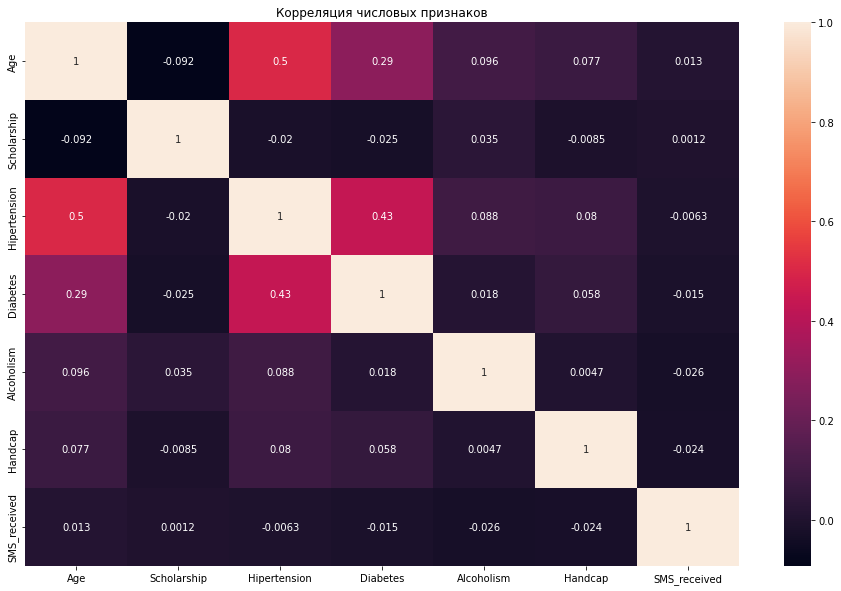

In [91]:
plt.figure(figsize=(16, 10))
plt.title('Корреляция числовых признаков')
sns.heatmap(only_int_features_df.corr(), annot=True)
ax.set_title("Распределение пациентов по возрасту")
experiment.log_figure(figure=plt)
plt.show()

Мультиколлинеарности нет. Все приннаки слабо кореллированны друг с другом. Никакие признаки удалять не нужно.

Наивысшее значение корреляции между признаками Age и Hipertension составляет 0.5, что говорит о слабой связи.

In [92]:
experiment.end()

COMET INFO: ---------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url                   : https://www.comet.ml/chepell/med-appointment/824fed22e6e54dd5bfcf0e193b17bb26
COMET INFO:   Metrics:
COMET INFO:     accuracy : 0.7980836221170637
COMET INFO:   Parameters:
COMET INFO:     $_Unique Neighbourhood : 21
COMET INFO:     C                      : 1.0
COMET INFO:     class_weight           : 1
COMET INFO:     copy                   : True
COMET INFO:     dual                   : False
COMET INFO:     fit_intercept          : True
COMET INFO:     intercept_scaling      : 1
COMET INFO:     l1_ratio               : 1
COMET INFO:     max_iter               : 100
COMET INFO:     model_type             : logreg
COMET INFO:     multi_class            : auto
COMET INFO:     n_jobs                 : 1
COMET INFO:     penalty                : l2
COMET INFO:     quanti